In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

def data_file_read(train_file, test_file):
    trndata = pd.read_csv(train_file)
    tstdata = pd.read_csv(test_file)
    trndata1 = trndata.shape
    trndata2 = trndata.info()
    trndata3 = trndata.isnull().sum()
    trndata4 = trndata.describe()
    return trndata, tstdata, trndata1, trndata2, trndata3, trndata4

trndata, tstdata, trndata_shape, trndata_info, trndata_null, trndata_desc = data_file_read('/content/drive/MyDrive/group15/train.csv', '/content/drive/MyDrive/group15/test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
trndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
trndata.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [6]:
trndata.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [7]:
trndata_shape

(8693, 14)

In [8]:
trndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
trndata.describe().T.style.background_gradient(cmap = "Pastel1")

In [11]:
import re
import numpy as np

def process_cabin_info(df):
    def extract_room_number(cabin):
        match = re.search(r'/(\d+)/', cabin)
        return match.group(1) if match else np.nan

    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
    df['Side'] = df['Cabin'].apply(lambda x: x[-1] if pd.notnull(x) else np.nan)
    df['Room'] = df['Cabin'].apply(lambda x: extract_room_number(x) if pd.notnull(x) else np.nan)
    return df

# Example usage:
trndata = process_cabin_info(trndata)
tstdata = process_cabin_info(tstdata)

In [12]:
tstdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  Deck          4177 non-null   object 
 14  Side          4177 non-null   object 
 15  Room          4177 non-null   object 
dtypes: float64(6), object(10)
memory usage: 534.8+ KB


# EDA (Exploratory Data Analysis).

Top 20 Passengers' Age and Transportation Status

In [13]:
import plotly.express as px

# Create a dictionary of data.
data = dict(PassengerId=trndata['PassengerId'], Age=trndata['Age'], Transported=trndata['Transported'])

# Create a bar chart
fig = px.bar(data, x='PassengerId', y='Age', color='Transported', barmode='group')

# Rotate the x-axis labels by 90 degrees
fig.update_xaxes(tickangle=90)

# Show the top 20 passengers
fig.update_xaxes(range=[0, 20])

# Set the title of the bar chart
fig.update_layout(title="Top 20 Passengers' Age and Transportation Status")

# Display the bar chart
fig.show()


Top 20 Passengers' Total Expense.

In [14]:
trndata['total_expanse'] = trndata['RoomService'] + trndata['FoodCourt'] + trndata['ShoppingMall'] + trndata['Spa'] + trndata['VRDeck']

# Create a dictionary of data.
data = dict(PassengerId=trndata['PassengerId'], TotalExpense=trndata['total_expanse'])

# Create a DataFrame from the dictionary.
df = pd.DataFrame(data)

# Group by PassengerId and sum the TotalExpense.
groupeddf = df.groupby('PassengerId').sum().reset_index()

# Sort by TotalExpense in descending order and select the top 20 passengers.
top_20_passengers = groupeddf.sort_values(by='TotalExpense', ascending=False).head(20)

# Create a bar chart.
fig = px.bar(top_20_passengers, x='PassengerId', y='TotalExpense', barmode='group')

# Rotate the x-axis labels by 90 degrees.
fig.update_xaxes(tickangle=90)

# Set the title of the bar chart.
fig.update_layout(title="Top 20 Passengers' Total Expense in Room Service, Food Court, Spa, Shopping Mall, and Vedek")

# Display the bar chart.
fig.show()


Top 20 Passengers' Expenses by Transportation Status.

In [15]:
# Create a dictionary of data.
data = dict(PassengerId=trndata['PassengerId'], expense=trndata['total_expanse'], Transported=trndata['Transported'])

# Create a bar chart.
fig = px.bar(data, x='PassengerId', y='expense', color='Transported', barmode='group')

# Rotate the x-axis labels by 90 degrees.
fig.update_xaxes(tickangle=90)

# Show the top 20 passengers.
fig.update_xaxes(range=[0, 20])

# Set the title of the bar chart.
fig.update_layout(title="Top 20 Passengers' Expenses by Transportation Status")

# Display the bar chart.
fig.show()


In [16]:
a = pd.DataFrame(data)
a.head()

PassengerId  expense  Transported
0     0001_01      0.0        False
1     0002_01    736.0         True
2     0003_01  10383.0        False
3     0003_02   5176.0        False
4     0004_01   1091.0         True

In [18]:
trndata.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported Deck Side Room  total_expanse  
0        False    B    P    0            0.0  
1         True    F    S    0          736.0  
2        False    A    S    0        10383.0  
3        False    A    S    0         5176.0  
4         True    F    S    1         1091.0

In [17]:
trndata['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [19]:
trndata['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

# 4th Graph.

In [20]:
def cat_eda(data, feature, target):
    # Count plot for feature distribution
    fig = px.histogram(data, x=feature, color_discrete_sequence=['orange'], title=f"{feature} Distribution")

    # Update layout for better visualization
    fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.8)  # Add edgecolor effect
    fig.update_layout(barmode='group')  # Ensure bars are grouped for multi-colored bars
    fig.update_xaxes(categoryorder='total descending')  # Order categories by frequency

    # Calculate counts for each category
    counts = data[feature].value_counts().reset_index()
    counts.columns = [feature, 'count']

    # Add annotations with counts on top of each bar
    for count_data in counts.iterrows():
        fig.add_annotation(
            x=count_data[1][feature],
            y=count_data[1]['count'],
            text=str(count_data[1]['count']),
            font=dict(color='black', size=12),
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40
        )

    # Set the title of the bar chart
    fig.update_layout(title=f"{feature} Distribution with counts")

    # Display the plot
    fig.show()

# Example usage:
cat_eda(trndata, "HomePlanet", "Transported")

In [21]:
import plotly.express as px

def cat_eda(data, feature, target):
    # Count plot for feature distribution
    fig = px.histogram(data, x=feature, color=target, title=f"{feature} Distribution with {target}")

    # Update layout for better visualization
    fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.8)  # Add edgecolor effect
    fig.update_layout(barmode='group')  # Ensure bars are grouped for multi-colored bars
    fig.update_xaxes(categoryorder='total descending')  # Order categories by frequency

    # Calculate counts for each category
    counts = data[[feature, target]].groupby([feature, target]).size().reset_index(name='count')

    # Add annotations with counts on top of each bar
    for count_data in counts.iterrows():
        fig.add_annotation(
            x=count_data[1][feature],
            y=count_data[1]['count'],
            text=str(count_data[1]['count']),
            font=dict(color='black', size=12),
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40
        )

    # Set the title of the bar chart
    fig.update_layout(title=f"{feature} Distribution with {target}")

    # Display the plot
    fig.show()

# Example usage:
cat_eda(trndata, "HomePlanet", "Transported")


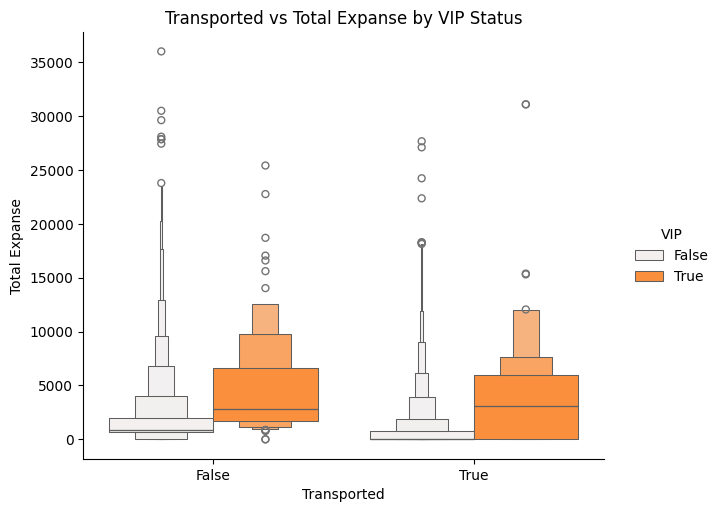

In [22]:
# Import necessary libraries
import seaborn as sesn
import matplotlib.pyplot as mtpt

# Assuming trndata is your DataFrame
# Create the catplot
sesn.catplot(
    x="Transported",
    y="total_expanse",
    kind="boxen",
    hue="VIP",
    errorbar='sd',
    palette='light:#fa903e',
    data=trndata,
    saturation=1,
    height=5,
    aspect=1.3,
    margin_titles=True
)

# Set plot labels and title
mtpt.xlabel('Transported')
mtpt.ylabel('Total Expanse')
mtpt.title('Transported vs Total Expanse by VIP Status')

# Show the plot
mtpt.show()


<Axes: >

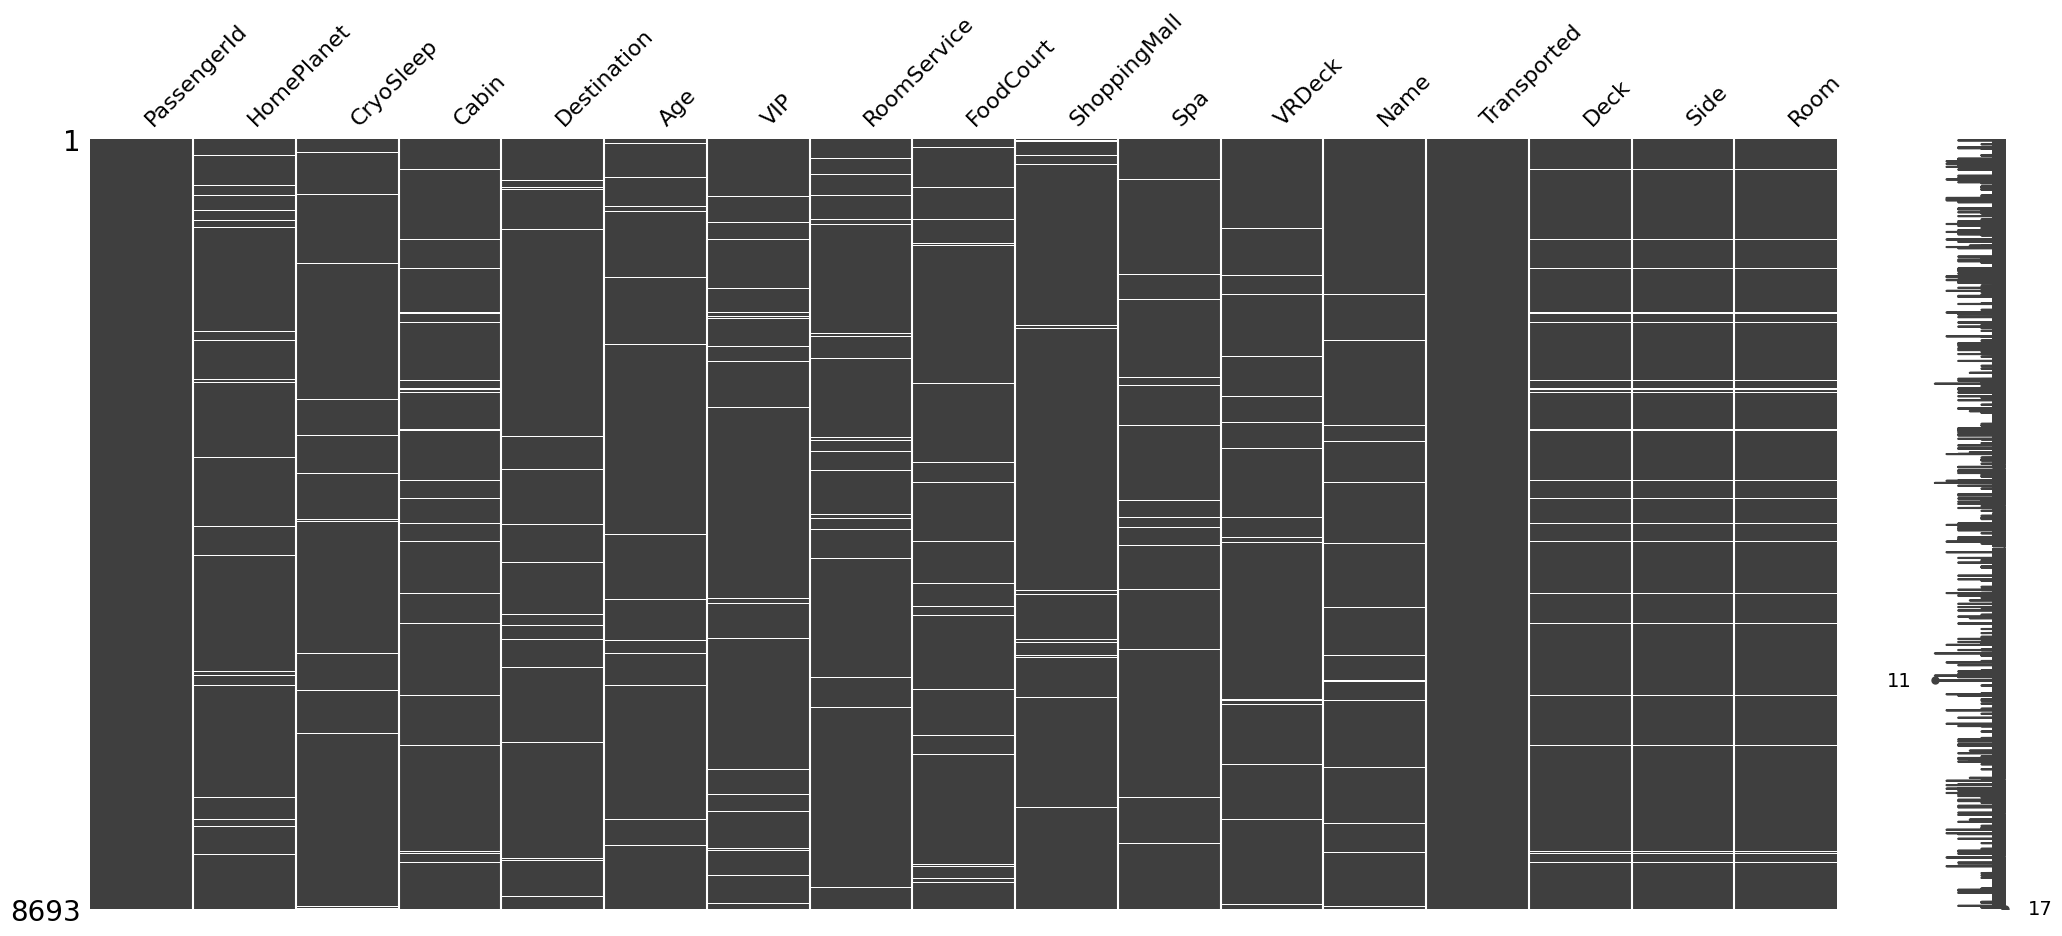

In [23]:
import missingno as msno
msno.matrix(trndata.drop(columns=['total_expanse']))

In [24]:
trndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8492 non-null   object 
 2   CryoSleep      8476 non-null   object 
 3   Cabin          8494 non-null   object 
 4   Destination    8511 non-null   object 
 5   Age            8514 non-null   float64
 6   VIP            8490 non-null   object 
 7   RoomService    8512 non-null   float64
 8   FoodCourt      8510 non-null   float64
 9   ShoppingMall   8485 non-null   float64
 10  Spa            8510 non-null   float64
 11  VRDeck         8505 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  Deck           8494 non-null   object 
 15  Side           8494 non-null   object 
 16  Room           8494 non-null   object 
 17  total_expanse  7785 non-null   float64
dtypes: bool(

In [25]:
trndata['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as mtpt
import seaborn as sesn
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
import numpy as np
from sklearn.preprocessing import label_binarize

def evaluate_model(ytre, yprd, yprba, plot_title="Model Evaluation"):
    # Ensure ytre is 1-dimensional
    if ytre.ndim != 1:
        ytre = np.argmax(ytre, axis=1)

    # Calculate metrics
    acc = accuracy_score(ytre, yprd) #calculating the accuracy score
    prec = precision_score(ytre, yprd, average='weighted')  #calculating the precision score
    rec = recall_score(ytre, yprd, average='weighted') #calculating the recall score
    f1 = f1_score(ytre, yprd, average='weighted') #calculating the f1 score
    rocauc = roc_auc_score(ytre, yprba[:, 1]) if yprba.shape[1] == 2 else roc_auc_score(ytre, yprba, average='weighted', multi_class='ovr')

    # Print classification report
    print("Classification Report:")
    print(classification_report(ytre, yprd))

    # Print metrics
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {rocauc}")
    print()

    # Plot confusion matrix
    cm = confusion_matrix(ytre, yprd) #calculating the confusion matrix using confusion_metrix that is available in sklearn
    mtpt.figure(figsize=(6, 4)) #setting up the size of the plot
    sesn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #it will gonna plot the heatmap of confusion metrix using seaborn module
    mtpt.title(f"{plot_title} - Confusion Matrix") #setting up the title of the plot
    mtpt.xlabel("Predicted Labels") #setting up the label of the x axis of the x axis of the plot
    mtpt.ylabel("True Labels") #setting up the label of the y axis of the y axis of the plot
    mtpt.show() #displaying the plot

    print()

    fpr, tpr, _ = roc_curve(ytre, yprba[:, 1]) #calculating the false positive rate and true positive rate using roc_curve that is available in sklearn
    mtpt.figure(figsize=(6,4)) #setting up the size of the plot
    mtpt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {rocauc:.2f})') #plotting the roc curve using matplotlib module
    mtpt.plot([0, 1], [0, 1], 'k--', lw=2) #plotting the diagonal line using matplotlib module
    mtpt.xlim([0.0, 1.0]) #setting up the x limit of the plot
    mtpt.ylim([0.0, 1.05]) #setting up the y limit of the plot
    mtpt.xlabel('False Positive Rate') #setting up the label of the x axis of the x axis of the plot
    mtpt.ylabel('True Positive Rate') #setting up the label of the y axis of the y axis of the plot
    mtpt.title(f'{plot_title} - ROC-AUC Curve') #setting up the title of the plot
    mtpt.legend(loc="lower right") #setting up the legend of the plot
    mtpt.show() #displaying the plot

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = trndata.drop(['Transported','total_expanse'], axis=1)
y = trndata['Transported'].astype(int)  # Convert boolean to int

In [28]:
# Define categorical and numerical columns
categoricfeatures = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numericfeatures = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Room']

In [29]:
#This code transforms the function that determines the preprocessing pipelines for numerical and categorical features
#in a machine learning dataset stands for a certain number that is attached to a specific item in the dataset. The ‘numerictransformr’ pipeline first deals with missing
#next transforms the actual # values by filling them with a median value then scales the data using standard
#scaling all the features to get them within a more standard range of 0-1, with mean of 0. 5 and using the ‘percent change from previous output’ method. The 'categorictransformr' pipeline imputes
#imputes missing values with the mode and performs one hot code transformation on categorical variables.
#Similarly to the previous vectorising methods, it enables # one-hot encoding also in the case of unknown categories during the transformation.
#As a result, ‘preprocessor’ combines two pipelines using ColumnTransformer and applies
#the numeric transformations to the selected numerical variables and the categorical
#Usual and necessary vectors of transformations occur to the specified categorical features, which get the dataset ready for
#model training.

# Define preprocessing steps
numerictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerictransformr, numericfeatures),
        ('cat', categorictransformr, categoricfeatures)
    ]
)

In [30]:
# Split the data
Xtrn, Xval, ytrn, yval = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=0e68371ee71b86c78231b7e86262afb0e9f86e6128934dab73cbb5f0e01ebacc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [32]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


##**CatBoostClassifier**

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Define the hyperparameter search space for CatBoost
search_space = {
    'iterations': hp.choice('iterations', [100, 200, 300, 500, 1000]),
    'depth': hp.choice('depth', [4, 6, 8, 10]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10)
}

# Define the objective xwdcflvc
def objective(params):
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(verbose=0, random_state=42, **params))
    ])

    score = cross_val_score(clf, Xtrn, ytrn, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Initialize Trials object
trials = Trials()

# Run hyperparameter optimization
best_params = fmin(fn=objective,
                   space=search_space,
                   algo=tpe.suggest,
                   max_evals=50,
                   trials=trials)

# Print the best parameters
print("Best parameters found: ", best_params)

# Convert hyperopt parameters to sklearn format
best_params = {
    'iterations': [100, 200, 300, 500, 1000][best_params['iterations']],
    'depth': [4, 6, 8, 10][best_params['depth']],
    'learning_rate': best_params['learning_rate'],
    'l2_leaf_reg': best_params['l2_leaf_reg']
}

# Re-train the model with the best parameters
best_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(verbose=0, random_state=42, **best_params))
])

100%|██████████| 50/50 [16:57<00:00, 20.35s/trial, best loss: -0.8144960666980434]
Best parameters found:  {'depth': 1, 'iterations': 0, 'l2_leaf_reg': 6.917957002912079, 'learning_rate': 0.15933632849324436}


In [34]:
best_clf.fit(Xtrn, ytrn)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck', 'Room']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP', 'Deck',
                                                   'Side'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7e4bebeb60b0>)])

In [35]:
# Make predictions
yprd_cat_train = best_clf.predict(Xtrn)
yprba_cat_train = best_clf.predict_proba(Xtrn)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3454
           1       0.85      0.87      0.86      3500

    accuracy                           0.86      6954
   macro avg       0.86      0.86      0.86      6954
weighted avg       0.86      0.86      0.86      6954

Accuracy: 0.8553350589588726
Precision: 0.8555195047904885
Recall: 0.8553350589588726
F1 Score: 0.8553023799886919
ROC AUC Score: 0.9406826867400117



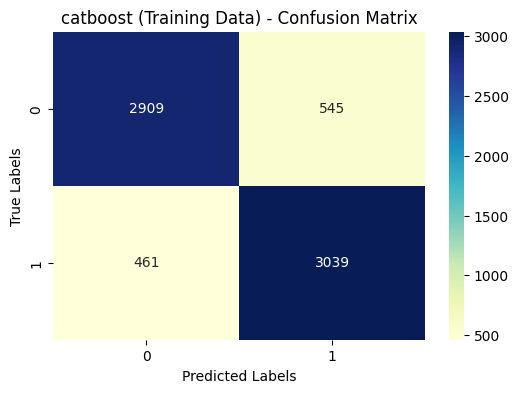

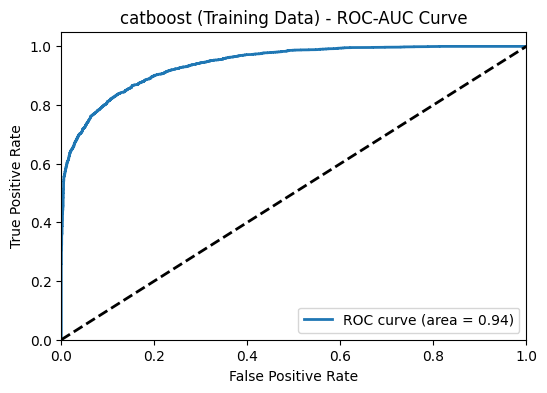

In [36]:
evaluate_model(ytrn, yprd_cat_train, yprba_cat_train, plot_title="catboost (Training Data)")

In [37]:
# Make predictions
yprd_cat_test = best_clf.predict(Xval)
yprba_cat_test = best_clf.predict_proba(Xval)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       861
           1       0.79      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

Accuracy: 0.8027602070155262
Precision: 0.8032843870529064
Recall: 0.8027602070155262
F1 Score: 0.8026176138851802
ROC AUC Score: 0.8981663002441935



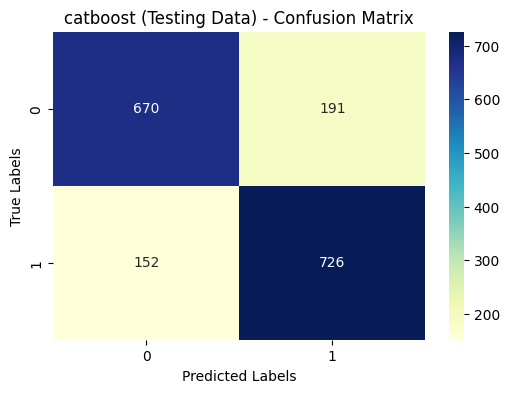

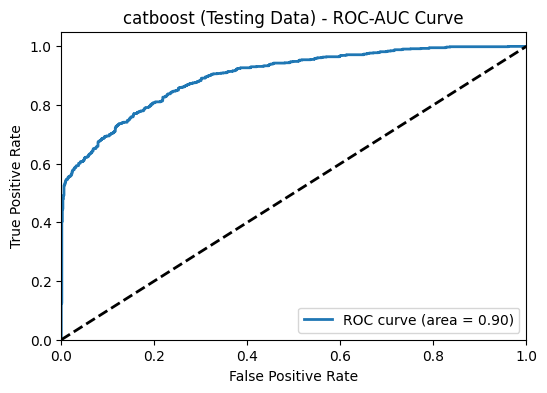

In [38]:
evaluate_model(yval, yprd_cat_test, yprba_cat_test, plot_title="catboost (Testing Data)")

In [39]:
# Define categorical and numerical columns
categoricfeatures = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numericfeatures = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Room']

In [40]:
# Define preprocessing steps
numerictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerictransformr, numericfeatures),
        ('cat', categorictransformr, categoricfeatures)
    ]
)

In [41]:
# Transform Xval and Xtrn using the preprocessor pipeline
Xval_transformed = best_clf.named_steps['preprocessor'].transform(Xval)
Xtrn_transformed = best_clf.named_steps['preprocessor'].transform(Xtrn)

# Get numerical and categorical feature names
numericfeatures = best_clf.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler'].get_feature_names_out(input_features=numericfeatures)
categoricfeatures = best_clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categoricfeatures)

# Combine numerical and categorical feature names
feature_names = np.concatenate((numericfeatures, categoricfeatures))

# Create DataFrames with column names
Xvaldf = pd.DataFrame(Xval_transformed, columns=feature_names)
Xtrndf = pd.DataFrame(Xtrn_transformed, columns=feature_names)

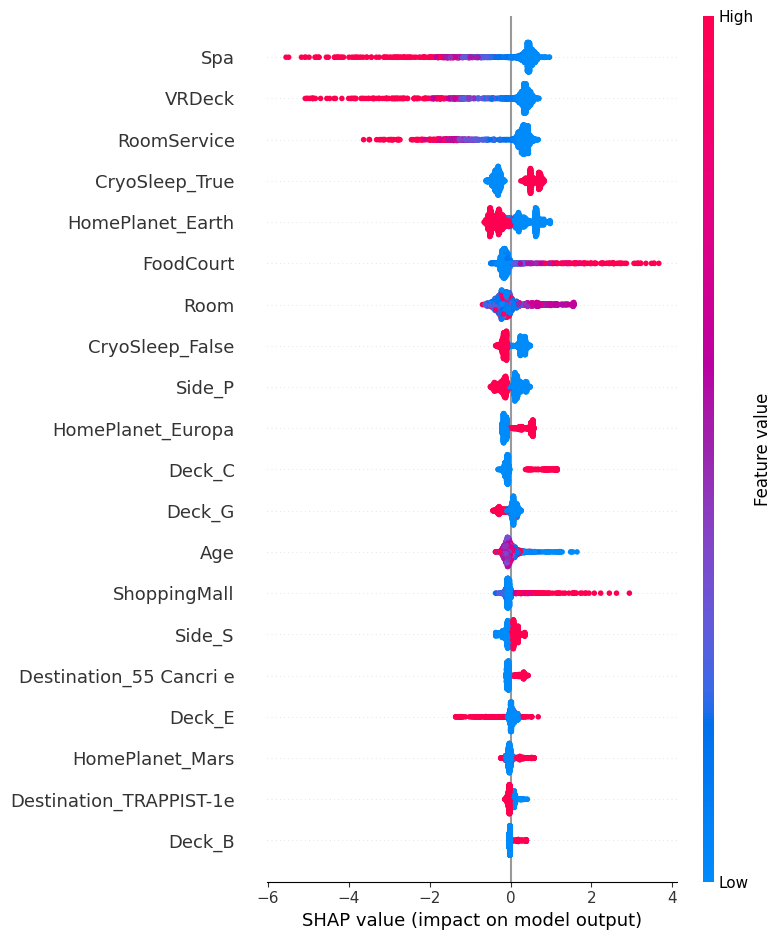

In [42]:
import shap

explainer = shap.Explainer(best_clf.named_steps['classifier'])

# Assume you already have your SHAP values calculated
shap_values = explainer.shap_values(Xvaldf)

# Create a SHAP summary plot as a beeswarm (dot) plot
shap.summary_plot(shap_values, Xvaldf, plot_type='dot')

In [43]:
import lime
import lime.lime_tabular

# 1. Define the model and data
model = best_clf.named_steps['classifier']
Xvaldf = pd.DataFrame(Xval_transformed, columns=feature_names)

# 2. Create a LIME explainer
explai = lime.lime_tabular.LimeTabularExplainer(
    training_data=Xtrndf.values,
    feature_names=feature_names,
    class_names=['Not Transported', 'Transported'],
    discretize_continuous=True
)

# 3. Select an instance to explain
instance_index = 10  # Select an instance from Xvaldf

# 4. Generate the explanation
explanation = explai.explain_instance(
    data_row=Xvaldf.iloc[instance_index],
    predict_fn=model.predict_proba
)

# 5. Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# 6. Optionally, save the explanation to a file
explanation.save_to_file("lime_explanation.html")


##**AdaBoost Classifier**

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space for AdaBoostClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Define the model
ada = AdaBoostClassifier(random_state=42)

# Define GridSearchCV
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Create a pipeline with preprocessing and the model
adaboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', grid_search)

])

In [45]:
# Fit the model
adaboost_model.fit(Xtrn, ytrn)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}


In [46]:
yprd_ada_train = adaboost_model.predict(Xtrn)
yprba_ada_train = adaboost_model.predict_proba(Xtrn)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3454
           1       0.79      0.83      0.81      3500

    accuracy                           0.81      6954
   macro avg       0.81      0.81      0.81      6954
weighted avg       0.81      0.81      0.81      6954

Accuracy: 0.8074489502444636
Precision: 0.8081832688090029
Recall: 0.8074489502444636
F1 Score: 0.8072916238885888
ROC AUC Score: 0.8932657374472661



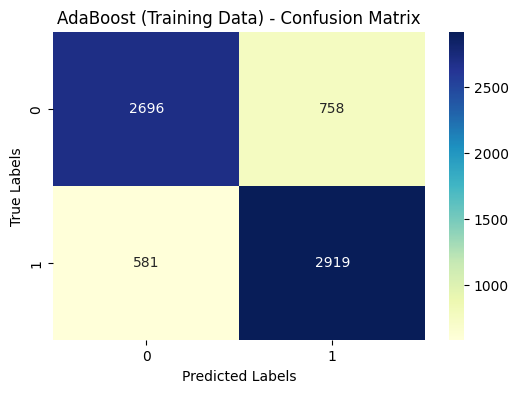

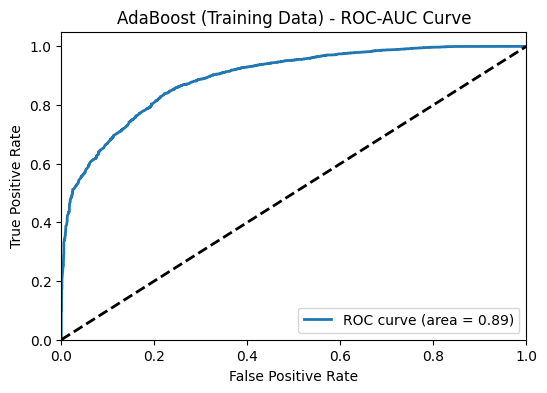

In [47]:
evaluate_model(ytrn, yprd_ada_train, yprba_ada_train, plot_title="AdaBoost (Training Data)")

In [48]:
yprd_ada_test = adaboost_model.predict(Xval)
yprba_ada_test = adaboost_model.predict_proba(Xval)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       861
           1       0.76      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Accuracy: 0.7826336975273146
Precision: 0.7841116981279193
Recall: 0.7826336975273146
F1 Score: 0.7822390534943251
ROC AUC Score: 0.8777656959778188



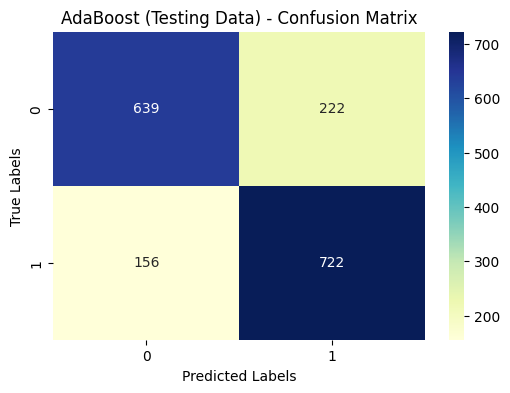

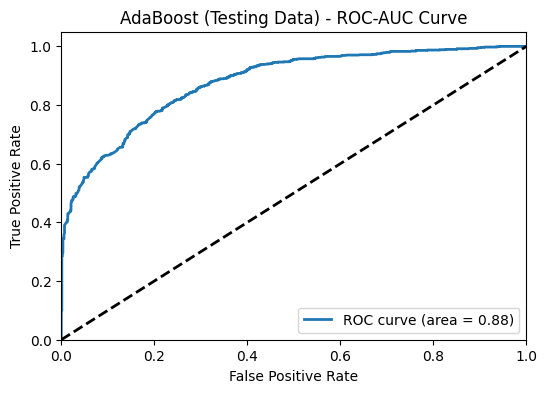

In [49]:
evaluate_model(yval, yprd_ada_test, yprba_ada_test, plot_title="AdaBoost (Testing Data)")

In [50]:
adaboost_model.named_steps['classifier'].best_estimator_

AdaBoostClassifier(learning_rate=1, random_state=42)

In [51]:
# Define categorical and numerical columns
categoricfeatures = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numericfeatures = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Room']

In [52]:
#This code transforms the function that determines the preprocessing pipelines for numerical and categorical features
#in a machine learning dataset stands for a certain number that is attached to a specific item in the dataset. The ‘numerictransformr’ pipeline first deals with missing
#next transforms the actual # values by filling them with a median value then scales the data using standard
#scaling all the features to get them within a more standard range of 0-1, with mean of 0. 5 and using the ‘percent change from previous output’ method. The 'categorictransformr' pipeline imputes
#imputes missing values with the mode and performs one hot code transformation on categorical variables.
#Similarly to the previous vectorising methods, it enables # one-hot encoding also in the case of unknown categories during the transformation.
#As a result, ‘preprocessor’ combines two pipelines using ColumnTransformer and applies
#the numeric transformations to the selected numerical variables and the categorical
#Usual and necessary vectors of transformations occur to the specified categorical features, which get the dataset ready for
#model training.

# Define preprocessing steps
numerictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerictransformr, numericfeatures),
        ('cat', categorictransformr, categoricfeatures)
    ]
)

In [53]:
# Transform Xval and Xtrn using the preprocessor pipeline
Xval_transformed = adaboost_model.named_steps['preprocessor'].transform(Xval)
Xtrn_transformed = adaboost_model.named_steps['preprocessor'].transform(Xtrn)

# Get numerical and categorical feature names
numericfeatures = adaboost_model.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler'].get_feature_names_out(input_features=numericfeatures)
categoricfeatures = adaboost_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categoricfeatures)

# Combine numerical and categorical feature names
feature_names = np.concatenate((numericfeatures, categoricfeatures))

# Create DataFrames with column names
Xvaldf = pd.DataFrame(Xval_transformed, columns=feature_names)
Xtrndf = pd.DataFrame(Xtrn_transformed, columns=feature_names)

In [54]:
adaboost_model.named_steps['classifier'].best_estimator_

AdaBoostClassifier(learning_rate=1, random_state=42)

In [55]:
import lime
import lime.lime_tabular

# 1. Define the model and data
model = adaboost_model.named_steps['classifier']
Xvaldf = pd.DataFrame(Xval_transformed, columns=feature_names)

# 2. Create a LIME explainer
explai = lime.lime_tabular.LimeTabularExplainer(
    training_data=Xtrndf.values,
    feature_names=feature_names,
    class_names=['Not Transported', 'Transported'],
    discretize_continuous=True
)

# 3. Select an instance to explain
instance_index = 10  # Select an instance from Xvaldf

# 4. Generate the explanation
explanation = explai.explain_instance(
    data_row=Xvaldf.iloc[instance_index],
    predict_fn=model.predict_proba
)

# 5. Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# 6. Optionally, save the explanation to a file
explanation.save_to_file("lime_explanation.html")


##**LGBM Model**

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# Define the hyperparameter search space for LGBMClassifier
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [50, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10]
}

# Define the model
lgbm = LGBMClassifier(random_state=42,force_col_wise=True,verbose=-1)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Create a pipeline with preprocessing and the model
lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', random_search)
])

In [57]:
# Fit the model
lgbm_model.fit(Xtrn, ytrn)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [58]:
yprd_lgb_train=lgbm_model.predict(Xtrn)
yprba_lgb_train=lgbm_model.predict_proba(Xtrn)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3454
           1       0.88      0.89      0.89      3500

    accuracy                           0.89      6954
   macro avg       0.89      0.89      0.89      6954
weighted avg       0.89      0.89      0.89      6954

Accuracy: 0.8859649122807017
Precision: 0.8859964366535636
Recall: 0.8859649122807017
F1 Score: 0.8859582260536779
ROC AUC Score: 0.9629686905451236



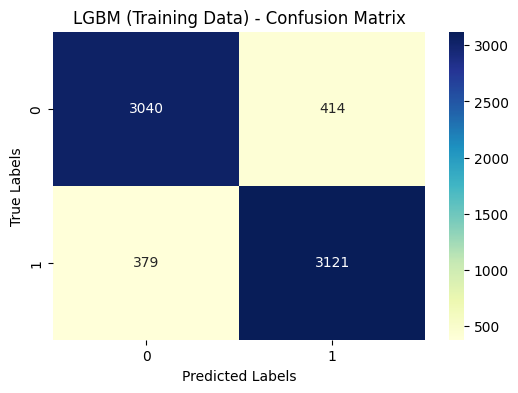

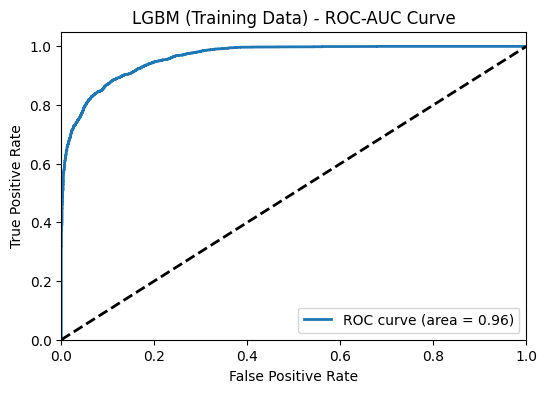

In [59]:
evaluate_model(ytrn, yprd_lgb_train, yprba_lgb_train, plot_title="LGBM (Training Data)")

In [60]:
yprd_lgb_test=lgbm_model.predict(Xval)
yprba_lgb_test=lgbm_model.predict_proba(Xval)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       861
           1       0.80      0.82      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

Accuracy: 0.8039102932719954
Precision: 0.8039890551033033
Recall: 0.8039102932719954
F1 Score: 0.8038728003303013
ROC AUC Score: 0.8966033827276119



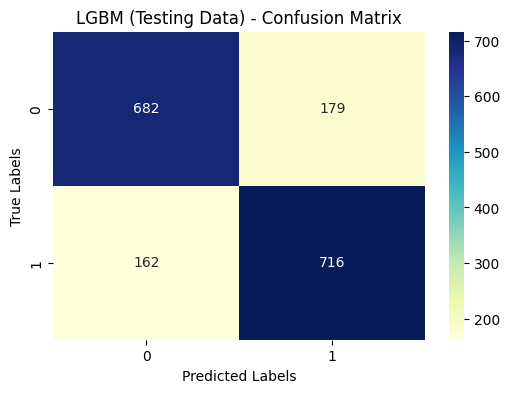

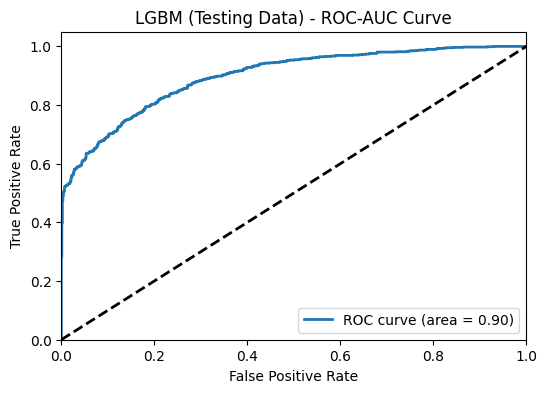

In [61]:
evaluate_model(yval, yprd_lgb_test, yprba_lgb_test, plot_title="LGBM (Testing Data)")

In [62]:
# Define categorical and numerical columns
categoricfeatures = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numericfeatures = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Room']

In [63]:
#This code transforms the function that determines the preprocessing pipelines for numerical and categorical features
#in a machine learning dataset stands for a certain number that is attached to a specific item in the dataset. The ‘numerictransformr’ pipeline first deals with missing
#next transforms the actual # values by filling them with a median value then scales the data using standard
#scaling all the features to get them within a more standard range of 0-1, with mean of 0. 5 and using the ‘percent change from previous output’ method. The 'categorictransformr' pipeline imputes
#imputes missing values with the mode and performs one hot code transformation on categorical variables.
#Similarly to the previous vectorising methods, it enables # one-hot encoding also in the case of unknown categories during the transformation.
#As a result, ‘preprocessor’ combines two pipelines using ColumnTransformer and applies
#the numeric transformations to the selected numerical variables and the categorical
#Usual and necessary vectors of transformations occur to the specified categorical features, which get the dataset ready for
#model training.

# Define preprocessing steps
numerictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorictransformr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerictransformr, numericfeatures),
        ('cat', categorictransformr, categoricfeatures)
    ]
)

In [64]:
# Transform Xval and Xtrn using the preprocessor pipeline
Xval_transformed = lgbm_model.named_steps['preprocessor'].transform(Xval)
Xtrn_transformed = lgbm_model.named_steps['preprocessor'].transform(Xtrn)

# Get numerical and categorical feature names
numericfeatures = lgbm_model.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler'].get_feature_names_out(input_features=numericfeatures)
categoricfeatures = lgbm_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categoricfeatures)

# Combine numerical and categorical feature names
feature_names = np.concatenate((numericfeatures, categoricfeatures))

# Create DataFrames with column names
Xvaldf = pd.DataFrame(Xval_transformed, columns=feature_names)
Xtrndf = pd.DataFrame(Xtrn_transformed, columns=feature_names)

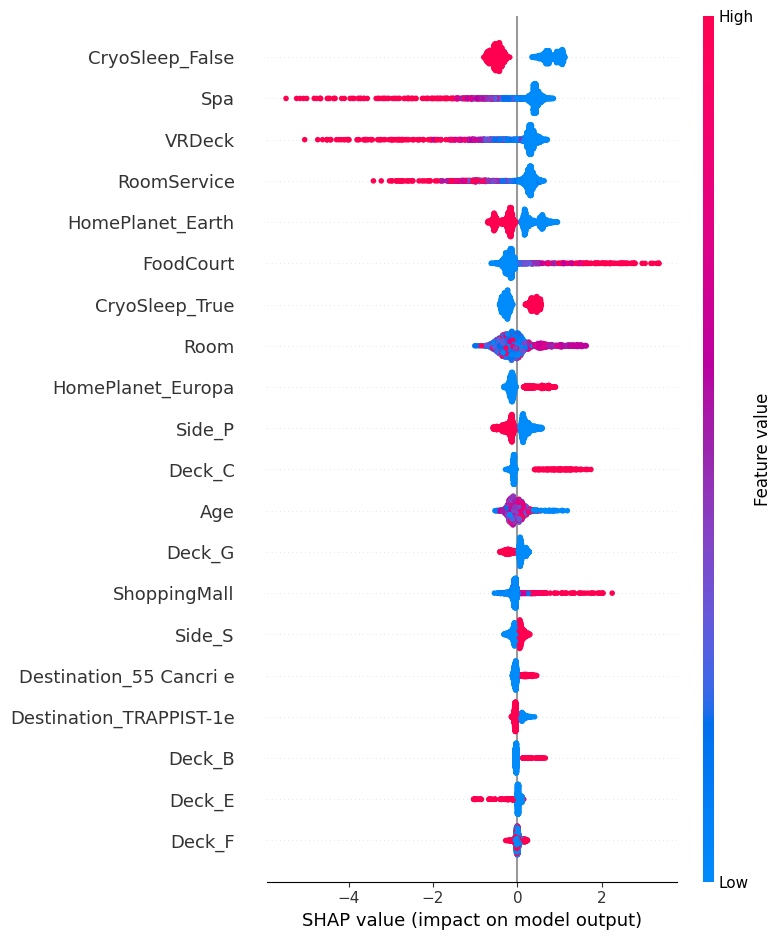

In [65]:
import shap

explainer = shap.Explainer(lgbm_model.named_steps['classifier'].best_estimator_)

# Assume you already have your SHAP values calculated
shap_values = explainer.shap_values(Xvaldf)

# Create a SHAP summary plot as a beeswarm (dot) plot
shap.summary_plot(shap_values, Xvaldf, plot_type='dot')

In [66]:
import lime

# 1. Define the model and data
model = lgbm_model.named_steps['classifier'].best_estimator_
Xvaldf = pd.DataFrame(Xval_transformed, columns=feature_names)

# 2. Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=Xtrndf.values,
    feature_names=feature_names,
    class_names=['Not Transported', 'Transported'],
    discretize_continuous=True
)

# 3. Select an instance to explain
instance_index = 10  # Select an instance from Xvaldf

# 4. Generate the explanation
explanation = explainer.explain_instance(
    data_row=Xvaldf.iloc[instance_index],
    predict_fn=model.predict_proba
)

# 5. Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# 6. Optionally, save the explanation to a file
explanation.save_to_file("lime_explanation.html")


In [67]:
test_predictions = lgbm_model.predict(tstdata)

In [69]:
subm = pd.DataFrame({
    'PassengerId': tstdata['PassengerId'],
    'Transported': test_predictions
})
# Convert the Transported column to boolean (if it's not already)
subm['Transported'] = subm['Transported'].astype(bool)

# Save the submission DataFrame to a CSV file
subm_file_path = 'submission.csv'
subm.to_csv(subm_file_path, index=False)